In [1]:
import numpy as np
import scanpy as sc
import ToppCellPy as tp
import warnings
warnings.filterwarnings("ignore")

### 1. load data

This PBMC dataset is from [Kang et al.2017](https://www.nature.com/articles/nbt.4042?report=reader), which includes two conditions (IFN stimulation and control) and six cell types. It can be downloaded from GSE96583.

In [2]:
output_dir = "/Users/jinmr2/Dropbox/Code/data/toppcell_test/" # define output folder
adata = sc.read("/Users/jinmr2/Dropbox/Code/data/batch2_all_normalized_filtered.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 24673 × 35635
    obs: 'tsne1', 'tsne2', 'ind', 'stim', 'cluster', 'cell', 'multiplets'
    var: 'gene symbol'
    uns: 'log1p'

In [4]:
adata.obs.head()

,tsne1,tsne2,ind,stim,cluster,cell,multiplets
AAACATACATTTCC-1,-27.640373,14.966629,1016,ctrl,9,CD14+ Monocytes,singlet
AAACATACCAGAAA-1,-27.493646,28.924885,1256,ctrl,9,CD14+ Monocytes,singlet
AAACATACCATGCA-1,-10.468194,-5.984389,1488,ctrl,3,CD4 T cells,singlet
AAACATACCTCGCT-1,-24.367997,20.429285,1256,ctrl,9,CD14+ Monocytes,singlet
AAACATACCTGGTA-1,27.952170,24.159738,1039,ctrl,4,Dendritic cells,singlet


We select two cell annotations in metadata for ToppCell gene module generation: stimulation ("stim") and cell type ("cell").

### 2. create shred object

Create a shred object with shred plan.

In [5]:
shred = tp.Shred(adata = adata,
                shred_plan = ["stim", "cell", "stim+cell|stim"],
                bin_group = ["stim", "cell"],
                order_bins = None,
                order_modules = None,
                method = "wilcoxon",
                output_dir = output_dir)

In [6]:
# conduct differential expression based on the shred plan
shred.do_shredplan()

... storing 'bin_group' as categorical
... storing 'bin_id' as categorical
... storing 'bin_group' as categorical
... storing 'bin_id' as categorical
... storing 'bin_group' as categorical
... storing 'bin_id' as categorical
... storing 'target_value' as categorical
... storing 'bin_group' as categorical
... storing 'bin_id' as categorical
... storing 'target_value' as categorical


### 3. generate heatmap

Create a heatmap that contains all gene modules from the shred plan.

In [7]:
shred.create_heatmap_matrix()

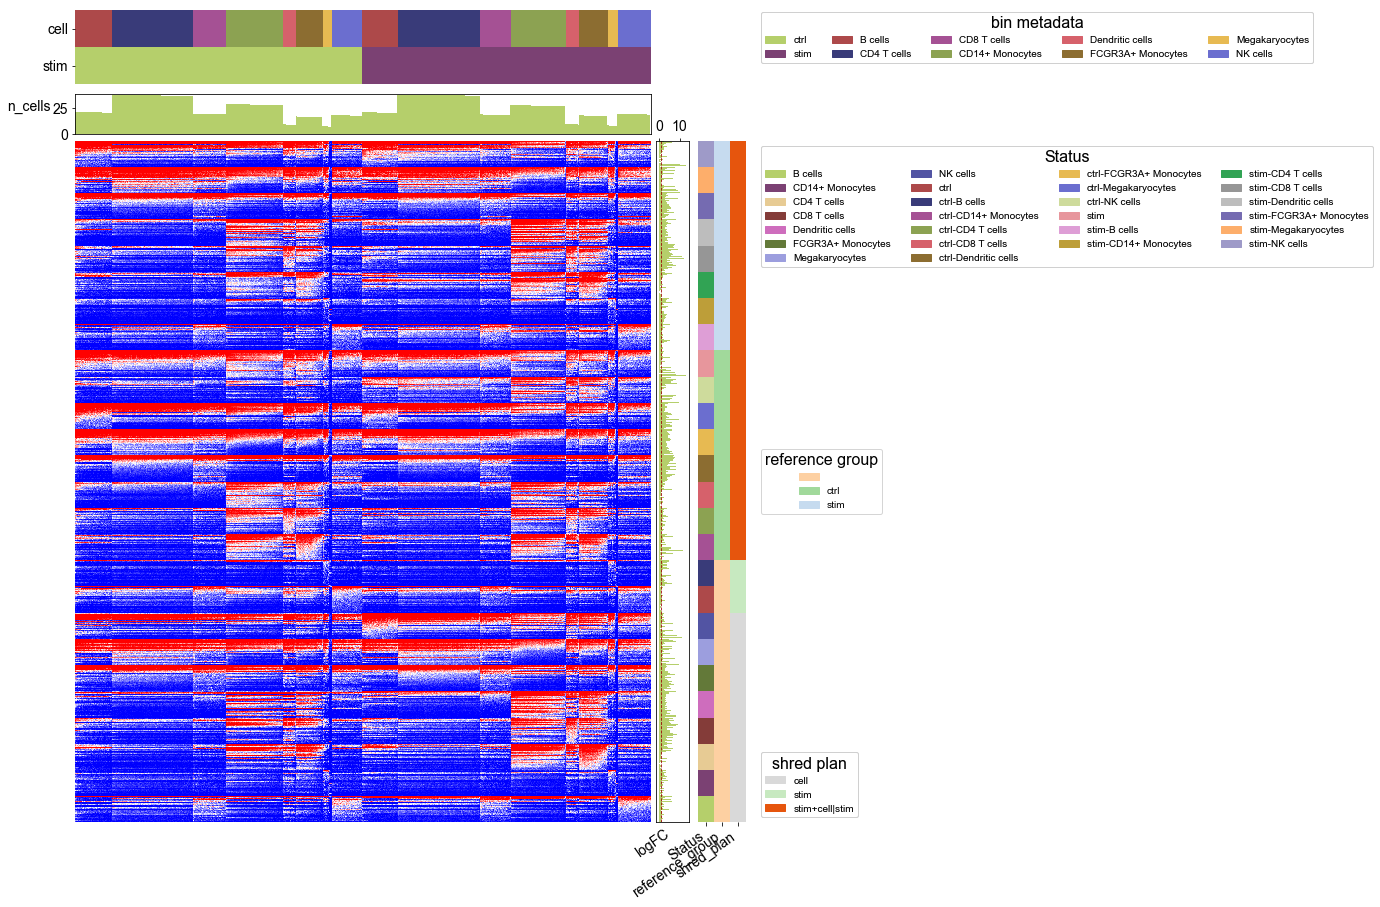

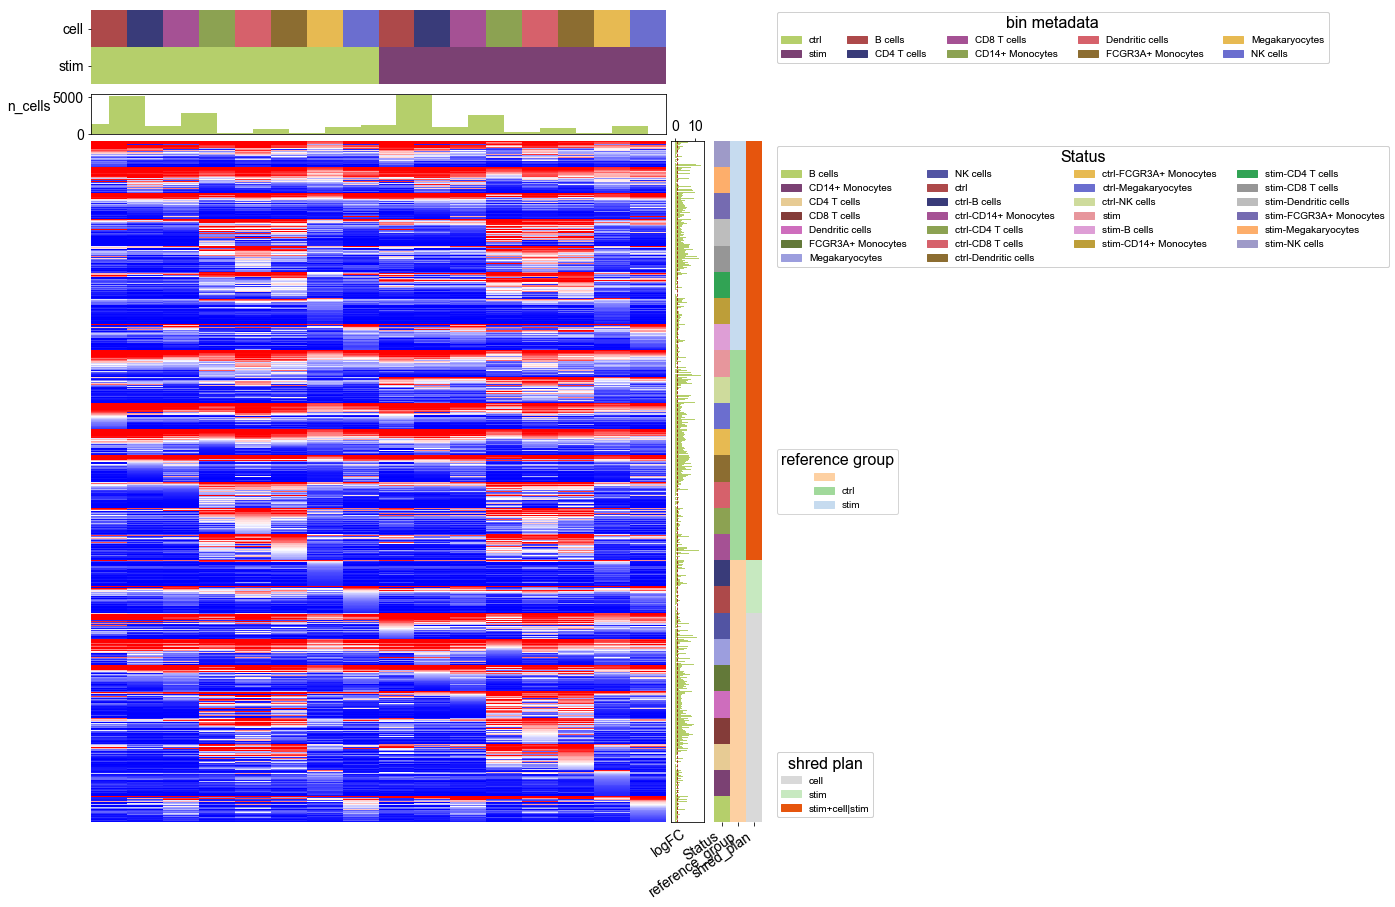

In [8]:
# draw heatmap for these gene modules.
shred.draw_heatmap()

### 4. gene module enrichment & ToppCluster map

In [9]:
shred.enrich_modules(categories = ["GeneOntologyCellularComponent"])

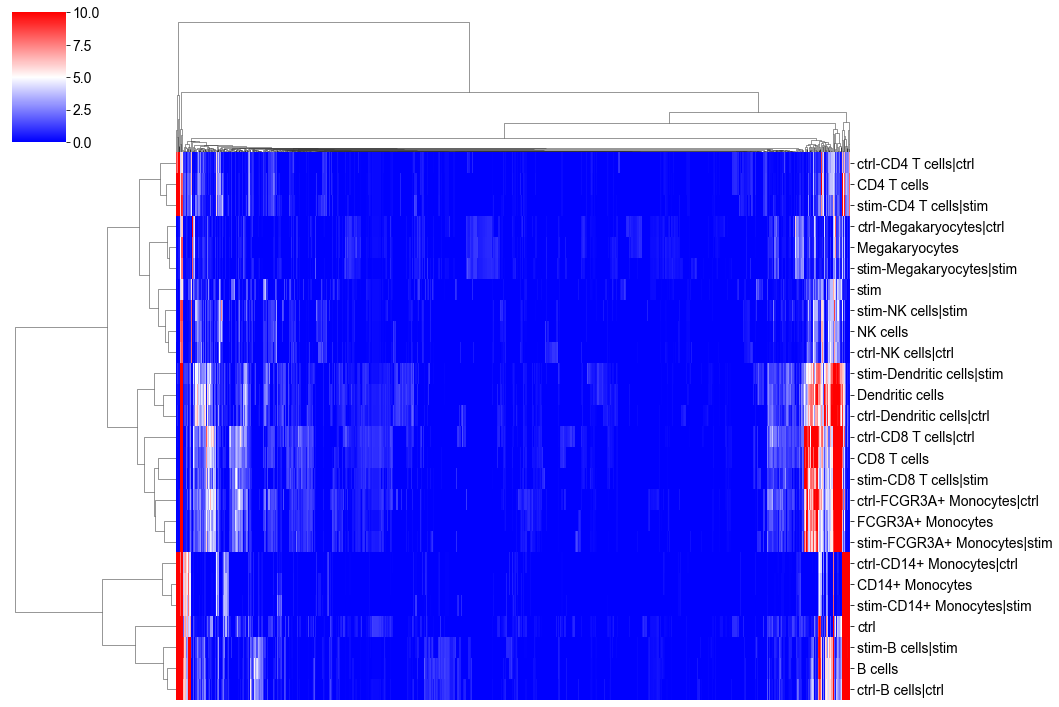

In [10]:
shred.toppcluster()

In [11]:
shred.createGCT()